In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py # >7.3的高版本mat文件
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
from myUNet import *
from PIL import Image
# import rawpy

In [13]:
pathes=[f'./dataset/{i+1}.mat' for i in range(3064)]

In [60]:
# label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
# PID: patient ID
# image: image data
# tumorBorder: a vector storing the coordinates of discrete points on tumor border.
#     For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
#     It was generated by manually delineating the tumor border. So we can use it to generate
#     binary image of tumor mask.
# tumorMask: a binary image with 1s indicating tumor region

In [22]:
path = np.random.choice(pathes)

UnidentifiedImageError: cannot identify image file './dataset/925.mat'

In [21]:
with h5py.File(path, 'r') as f:
    data=f['cjdata']# 读取mat文件到data中
    fields=list(data.keys()) # 可以获取到字典的key
    
    # f.close()
    print(fields)

['PID', 'image', 'label', 'tumorBorder', 'tumorMask']


In [43]:
# 类定义，方便之后操作数据
class SampleImage:
    def __init__(self, path):
        with h5py.File(path, 'r') as f:
            self.PID=np.array(f['cjdata']['PID'])
            self.image=np.array(f['cjdata']['image'])
            self.label=np.array(f['cjdata']['label'][0][0])
            self.tumorBorder=np.array(f['cjdata']['tumorBorder'][0])
            self.tumorMask=np.array(f['cjdata']['tumorMask'])

In [44]:
path=np.random.choice(pathes)
sampleimage=SampleImage(path)

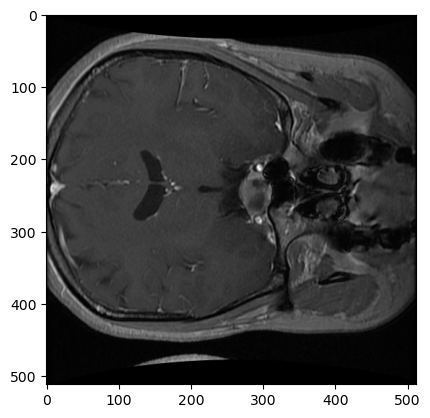

In [36]:
plt.imshow(sampleimage.image/256, 'gray')

In [51]:
print(np.max(sampleimage.image))
pil_img=Image.fromarray(sampleimage.image)
img_array=np.array(pil_img).astype('uint8')
print(np.max(img_array))

6714
255


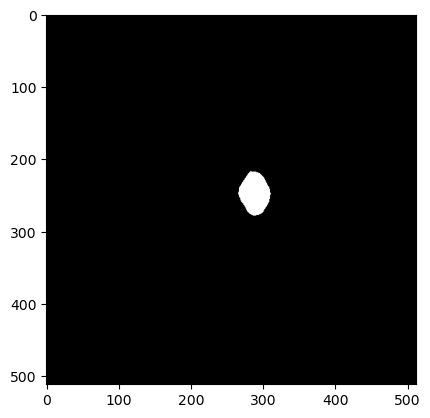

In [18]:
plt.imshow(sampleimage.tumorMask, 'gray')

In [50]:
type(sampleimage.tumorMask[0][0])

numpy.uint8

In [45]:
print(sampleimage.label)

2.0


In [7]:
plt.imshow(data['image'], 'gray')
plt.show()

ValueError: Invalid location identifier (invalid location identifier)

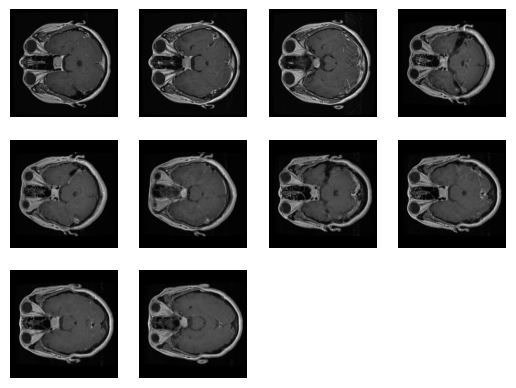

In [68]:
%matplotlib inline
images=[]
for path in pathes:
    f=h5py.File(path, 'r')
    data=f['cjdata']# 读取mat文件到data中
    fields=list(data.keys()) # 可以获取到字典的key
    images.append(np.array(data['image']))
for i in range(len(images)):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.axis('off')
plt.show()

In [69]:
mask=np.array(data['tumorMask'])

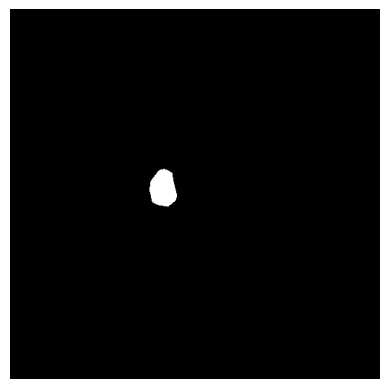

In [72]:
plt.imshow(mask, 'gray')
plt.axis('off')
plt.show()

In [80]:
f=h5py.File('./dataset/1.mat', 'r')
data=f['cjdata']# 读取mat文件到data中
image1=np.array(data['image'])
mask=np.array(data['tumorMask'])

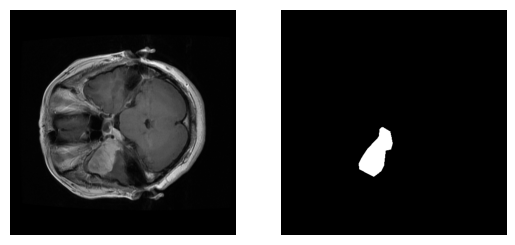

In [81]:
%matplotlib inline
plt.subplot(121)
plt.imshow(image1, 'gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(mask, 'gray')
plt.axis('off')
plt.show()